# Banco de dados #
% Inicialmente abrir o banco de dados e analisar o que temos %

In [ ]:
# IMPORTANDO AS BIBLIOTECAS QUE QUE SERÃO UTILIZADAS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import csv
from scipy import stats
from sklearn import metrics

%matplotlib inline

In [ ]:
#Importar base de dados do drive (Inserir base de dados no drive!!)

from google.colab import drive

drive.mount('/content/drive')

In [ ]:
#Abrir a base de dados csv com restrição de colunas para não estourar a memória

dados = pd.read_csv('/content/drive/My Drive/MICRODADOS_ENEM_2018.csv', sep=';', encoding='iso-8859-1', usecols=['TP_NACIONALIDADE','Q001','Q002', 'Q024', 'Q025', 'Q026','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','SG_UF_RESIDENCIA','TP_SEXO', 'TP_ESTADO_CIVIL','TP_COR_RACA','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ENSINO','TP_ESCOLA','SG_UF_ESC','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC','Q006','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])

#usecols=['SG_UF_RESIDENCIA','TP_SEXO', 'TP_ESTADO_CIVIL','TP_COR_RACA','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ENSINO','TP_ESCOLA','SG_UF_ESC','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC','Q006','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

In [ ]:
#Visualizar Banco de dados
dados.shape

%Descrição das Variáveis Utilizadas%

SG_UF_RESIDENCIA - Sigla da Unidade da Federação de residência

TP_ESCOLA - Tipo de escola do Ensino Médio (1-Não Respondeu, 2-Pública, 3-Privada, 4-Exterior)

NU_NOTA_CN - Nota Ciencias Naturais

NU_NOTA_CH - Nota Ciencias Humanas

NU_NOTA_LC - Nota de Linguagens e códigos

NU_NOTA_MT - Nota de Matemática

NU_NOTA_REDACAO - Nota da Redação

Q006 - Qual é a renda mensal de sua família? 

A	Nenhuma renda.

B	Até 954,00.

C	De 954,01 até 1.431,00.

D	De 1.431,01 até 1.908,00.

E	De 1.908,01 até 2.385,00.

F	De 2.385,01 até 2.862,00.

G	De 2.862,01 até 3.816,00.

H	De 3.816,01 até 4.770,00.

I	De 4.770,01 até 5.724,00.

J	De 5.724,01 até 6.678,00.

K	De 6.678,01 até 7.632,00.

L	De 7.632,01 até 8.586,00.

M	De 8.586,01 até 9.540,00.

N	De 9.540,01 até 11.448,00.

O	De 11.448,01 até 14.310,00.

P	De 14.310,01 até 19.080,00.

Q	Mais de 19.080,00.

# Análise das Notas de Matemática 

In [ ]:
#Distribuição das notas de matemática

x0 = dados['NU_NOTA_MT'].fillna(0)
sns.distplot(x0)

In [ ]:
dados.head()

In [ ]:
#Correlação entre as notas
corrAlvo = sns.heatmap(dados[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']].corr(method = 'pearson'), annot = True, cmap = 'YlGnBu')
corrAlvo = plt.gcf()
corrAlvo.set_size_inches(8,6)
plt.show()

In [ ]:
# DISTRIBUIÇÃO DAS NOTAS DE MATEMÁTICA POR TIPO DE ESCOLA
plt.figure(figsize=(12,4))
plt.title('Distribuição notas de Matemática por tipo de Escola')
sns.distplot(dados[dados['TP_ESCOLA'] == 2]['NU_NOTA_MT'], kde=True,bins=50, label='Publica')
sns.distplot(dados[dados['TP_ESCOLA'] == 3]['NU_NOTA_MT'], kde=True,bins=50, label='Privada')
plt.legend()
plt.show()

In [ ]:
#Boxplot Notas de Matemática por tipo de escola
plt.figure(figsize=(14,4))
ax = sns.catplot(x='TP_ESCOLA', y='NU_NOTA_MT', data = dados, kind="box")
plt.show();

In [ ]:
# MÉDIA DAS NOTAS DE MATEMÁTICA POR TIPO DE ESCOLA
dados.groupby('TP_ESCOLA')['NU_NOTA_MT'].mean()

In [ ]:
# DESVIO PADRÃO DAS NOTAS DE MATEMÁTICA POR TIPO DE ESCOLA
dados.groupby('TP_ESCOLA')['NU_NOTA_MT'].std()

In [ ]:
# MEDIANA DAS NOTAS DE MATEMÁTICA POR TIPO DE ESCOLA
dados.groupby('TP_ESCOLA')['NU_NOTA_MT'].median()

In [ ]:
#Variância
dados['NU_NOTA_MT'].var()

In [ ]:
#Distribuição das instâncias por estado do Brasil (Balancear os dados)
dados['SG_UF_RESIDENCIA'].value_counts()

In [ ]:
#teste para reduzir para 2469 
g = dados.groupby('SG_UF_RESIDENCIA')
g.apply(lambda x: x.sample(g.size().min()))

In [ ]:
y

In [ ]:
#Nota de matemática, 5 classes

#dados['y_true'] = np.where(dados['NU_NOTA_MT']<440, lambda dados: 1)


def classe(x):
    if x < 440 :
        return 1
    elif  440<x<490:
        return 2
    elif 490<x<540:
        return 3
    elif 540<x<620:
        return 4
    else:
        return 5 

dados['y_true'] = dados['NU_NOTA_MT'].apply (lambda x: classe(float(x))) 

In [ ]:
y_true = dados['y_true']

In [ ]:
#Entre 400 e 500
dados = dados.loc[dados['NU_NOTA_MT'] < 620]
dados = dados.loc[dados['NU_NOTA_MT'] >= 540]
dados.count()

In [ ]:
#Entre 500 e 600
nota56 = dados.loc[dados['NU_NOTA_MT'] < 600]
nota56 = dados.loc[dados['NU_NOTA_MT'] > 500]
dados.count()

In [ ]:
#Entre 600 e 700
dados = dados.loc[dados['NU_NOTA_MT'] < 700]
dados = dados.loc[dados['NU_NOTA_MT'] > 600]
dados.count()

In [ ]:
#Entre 700 e 800
dados = dados.loc[dados['NU_NOTA_MT'] < 800]
dados = dados.loc[dados['NU_NOTA_MT'] > 700]
dados.count()

In [ ]:
# DISTRIBUIÇÃO DAS NOTAS DE MATEMÁTICA POR SEXO
plt.figure(figsize=(12,4))
plt.title('Distribuição notas de Matemática por Sexo')
sns.distplot(dados[dados['TP_SEXO'] == 'M']['NU_NOTA_MT'], kde=True,bins=50, label='Masculino')
sns.distplot(dados[dados['TP_SEXO'] == 'F']['NU_NOTA_MT'], kde=True,bins=50, label='Feminino')
plt.legend()
plt.show()

In [ ]:
dados['TP_ANO_CONCLUIU']

In [ ]:
#Analisar se as maiores notas são de pessoas mais velhas ou das que acabaram de sair do EM. 
plt.figure(figsize=(12,4))
plt.title('Distribuição notas de Matemática por Ano')
sns.distplot(dados[dados['TP_ANO_CONCLUIU'] == 1]['NU_NOTA_MT'], kde=True,bins=50, label='2017')
sns.distplot(dados[dados['TP_ANO_CONCLUIU'] != 1]['NU_NOTA_MT'], kde=True,bins=50, label='Diferente 2017')
plt.legend()
plt.show()

In [ ]:
# Distribuição das notas de matemática por Raça

plt.figure(figsize=(14,6))
plt.title('Distribuição notas de Matemática')
sns.distplot(dados[dados['TP_COR_RACA']==0]['NU_NOTA_MT'], kde=True,bins=50, label='Não declarado')
sns.distplot(dados[dados['TP_COR_RACA']==1]['NU_NOTA_MT'], kde=True,bins=50, label='Branca')
sns.distplot(dados[dados['TP_COR_RACA']==2]['NU_NOTA_MT'], kde=True,bins=50, label='Preta')
sns.distplot(dados[dados['TP_COR_RACA']==3]['NU_NOTA_MT'], kde=True,bins=50, label='Parda')
sns.distplot(dados[dados['TP_COR_RACA']==4]['NU_NOTA_MT'], kde=True,bins=50, label='Amarela')
sns.distplot(dados[dados['TP_COR_RACA']==5]['NU_NOTA_MT'], kde=True,bins=50, label='Indígena ')
sns.distplot(dados[dados['TP_COR_RACA']==6]['NU_NOTA_MT'], kde=True,bins=50, label='Não dispõe da informação')
plt.legend()
plt.show();

In [ ]:
# NÚMERO DE CANDIDATOS QUE FALTARAM OU FORAM DESCLASSIFICADOS NA PROVA DE Ciências da Natureza

Nota_CN_Missing = dados[(dados['NU_NOTA_CN'].isnull() == True)]['NU_NOTA_MT'].shape[0]
Nota_CN_Missing

In [ ]:
# DOS CANDIDATOS, QUANTOS FORAM DESCLASSIFICADOS OU FALTARAM NA PROVA DE MATEMÁTICA?

dados[(dados['NU_NOTA_CH'].isnull() == True)&(dados['NU_NOTA_MT'].isnull() == True)].shape[0]

In [ ]:
# PORCENTAGEM DE CANDIDATOS QUE FORAM DESCLASSIFICADOS OU FALTARAM EM CN, MAS TIVERAM ALGUMA NOTA 
# EM MATEMÁTICA 

(dados[(dados['NU_NOTA_CN'].isnull() == True)&(dados['NU_NOTA_MT'].isnull() == False)].shape[0]/Nota_CN_Missing)*100

# Observe que nenhuma das pessoas que foram desclassificadas ou faltaram em Ciências da Natureza, 
# tiveram alguma nota em Matemática

In [ ]:
outlier_CN = list(dados[(dados['NU_NOTA_CN'].isnull() == True)&(dados['NU_NOTA_MT'].isnull() == False)].index)

In [ ]:
# PORCENTAGEM DOS CANDIDATOS CLASSIFICADOS ANALIZANDO ESSE QUESITO

(dados[(dados['NU_NOTA_CN'].isnull() == True)&(dados['NU_NOTA_MT'].isnull() == True)].shape[0]/Nota_CN_Missing)*100

In [ ]:
# Número de candidatos que faltaram ou foram desclassificadas na prova de Ciências Humanas

Nota_CH_Missing = dados[(dados['NU_NOTA_CH'].isnull() == True)]['NU_NOTA_MT'].shape[0]
Nota_CH_Missing

In [ ]:
# Porcentagem de candidatos que foram desclassificados ou faltaram em CH, mas tiveram alguma 
#nota em Matemática

(dados[(dados['NU_NOTA_CH'].isnull() == True)&(dados['NU_NOTA_MT'].isnull() == False)].shape[0]/Nota_CH_Missing)*100

In [ ]:
# Porcentagem de candidatos que estavam presentes em ambas as provas

(dados[(dados['NU_NOTA_CH'].isnull() == True)&(dados['NU_NOTA_MT'].isnull() == True)].shape[0]/Nota_CH_Missing)*100

In [ ]:
outlier_CH = list(dados[(dados['NU_NOTA_CH'].isnull() == True)&(dados['NU_NOTA_MT'].isnull() == False)].index)

In [ ]:
# NÚMERO DE PESSOAS QUE FALTARAM OU FORAM DESCLASSIFICADAS NA PROVA DE LINGUAGENS E CÓDIGOS

Nota_LC_Missing = dados[(dados['NU_NOTA_LC'].isnull() == True)]['NU_NOTA_MT'].shape[0]
Nota_LC_Missing

In [ ]:
# DOS CANDIDATOS, QUANTOS FORAM DESCLASSIFICADOS OU FALTARAM NA PROVA DE MATEMÁTICA?

dados[(dados['NU_NOTA_LC'].isnull() == True)&(dados['NU_NOTA_MT'].isnull() == True)].shape[0]

In [ ]:
# PORCENTAGEM DE CANDIDATOS QUE FORAM DESCLASSIFICADOS OU FALTARAM EM LC, MAS TIVERAM ALGUMA 
# NOTA EM MATEMÁTICA

(dados[(dados['NU_NOTA_LC'].isnull() == True)&(dados['NU_NOTA_MT'].isnull() == True)].shape[0]/Nota_LC_Missing)*100

# Pré processamento #
% Etapa de préprocessamento testando 7 técnicas diferentes%

In [ ]:
#Método de redução de instâncias
#Dados Faltantes
dados.isnull().sum()

In [ ]:
msno.bar(dados.sample(10000))

#sns.heatmap(dados.isnull(), cbar = False)

In [ ]:
# PORCENTAGEM DE VALORES FALTANTES POR ATRIBUTOS

(dados.isnull().sum() / dados.shape[0]) * 100

In [ ]:
# ELIMINANDO OS ATRIBUTOS COM PORCENTAGEM ACIMA DE 50% DE VALORES FALTANTES

excluColsNull = ['TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'SG_UF_ESC'] 

dados.drop(excluColsNull, axis = 1, inplace=True)

In [ ]:
#Eliminando nota de matemática igual a zero

dados[(dados['NU_NOTA_MT']==0)].shape[0]

In [ ]:
notaMT0 = dados[dados['NU_NOTA_MT']== 0]['NU_NOTA_MT']

In [ ]:
outlier_MT = list(dados[(dados['NU_NOTA_MT']==0)].index)

In [ ]:
# EXCLUSÃO DE DADOS NOS QUAIS O CANDIDATO FALTOU EM CN, CH OU TEVE NOTA EM MATEMÁTICA IGUAL A ZERO

outliers = list(set(outlier_CN + outlier_CH + outlier_MT))

In [ ]:
len(outliers)

In [ ]:
dados= dados.drop(outliers)

In [ ]:
dados[(dados['TP_PRESENCA_CN']==0) &(dados['NU_NOTA_MT']>600)].shape[0]

In [ ]:
dados[(dados['TP_PRESENCA_CH']==0) &(dados['NU_NOTA_MT']>600)].shape[0]

In [ ]:
outliersCN = list((dados[(dados['TP_PRESENCA_CN']==0) &(dados['NU_NOTA_MT']>600)]).index)
outliersCN

In [ ]:
outliersCH = list((dados[(dados['TP_PRESENCA_CH']==0) &(dados['NU_NOTA_MT']>600)]).index)
outliersCH

In [ ]:
outliersTP = list(set(outliersCN + outliersCH))

In [ ]:
dados= dados.drop(outliersTP)

In [ ]:
#VERIFICACO A DISTRIBUIÇÃO DAS NOTAS LEVANDO EM CONSIDERAÇÃO OS VALORES FALTANTES

sns.distplot(dados['NU_NOTA_LC'].fillna(0), label='NOTA_LC')
sns.distplot(dados['NU_NOTA_CH'].fillna(0), label='NOTA_CH')
sns.distplot(dados['NU_NOTA_LC'].fillna(0), label='NOTA_LC')
sns.distplot(dados['NU_NOTA_REDACAO'].fillna(0), label='NOTA_REDACAO')
plt.legend()
plt.show()

In [ ]:
# INFERIR ZERO AOS DADOS FALTANTES. PARTINDO DA IDÉIA QUE FALTA IMPLICA EM NOTA ZERO
dados = dados.fillna(value={'NU_NOTA_CN':0,'NU_NOTA_CH':0,'NU_NOTA_LC':0,
                                  'NU_NOTA_REDACAO':0, 'TP_STATUS_REDACAO':0, 'NU_NOTA_MT':0})

In [ ]:
dados.columns.values

In [ ]:
# PORCENTAGEM DE VALORES FALTANTES POR ATRIBUTO

(dados.isnull().sum() / dados.shape[0]) * 100

In [ ]:
#Deletar o restante dos dados faltantes

dados = dados.dropna(axis=0)

In [ ]:
dados.shape

In [ ]:
dados.head()

In [ ]:
# TRANSFOAMNDO DADOS DE TEXTUAIS EM NÚMERICOS

from sklearn.preprocessing import LabelEncoder

var_cat1 = ['SG_UF_RESIDENCIA', 'TP_SEXO', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO','TP_ESCOLA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
        'Q001','Q002', 'Q006', 'Q024', 'Q025', 'Q026']

le = LabelEncoder()

for i in var_cat1: 
    dados[i] = le.fit_transform(dados[i].astype(str))
    dados.dtypes

In [ ]:
#Filtro de baixa correlação

# POR MEIO DAS CORRELAÇÕES POSITIVAS E MAIS ALTAS, SELECIONAMOS AS FEATURES MAIS RELEVANTES PARA
# O NOSSO MODELO 

# 1º VAMOS VERIFICAR A CORRELAÇÃO DE TODAS AS VARIÁVEIS DO NOSSO CONJUNTO 

corrAlvo1 = sns.heatmap(dados.corr(method = 'pearson'), annot=True, cmap = 'YlGnBu')

corrAlvo = plt.gcf()
corrAlvo.set_size_inches(30,20)
plt.show()

In [ ]:
#Using Pearson Correlation (teste)
plt.figure(figsize=(30,20))
cor = dados.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["NU_NOTA_MT"])
#Seleção dos atributos
relevant_features = cor_target[cor_target>0.2]
relevant_features

In [ ]:
# CORRELAÇÃO ENTRE A NOTA DE MATEMÁTICA E OUTRAS NOTAS

dados[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']].corr()

In [ ]:
# CORRELAÇÃO ENTRE AS FALTAS NAS PROVAS 

dados[['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC']].corr()

In [ ]:
# CORRELAÇÃO ENTRE AS PRESENÇAS NAS PROVAS - GRAFICAMENTE

corrAlvo2 = sns.heatmap(dados[['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC']]
               .corr(method='pearson'), annot=True, cmap='YlGnBu')
corrAlvo=plt.gcf()
corrAlvo.set_size_inches(8,6)
plt.show()

# Percebemos que existe uma correlação muito alta entre faltas nas provas de outras disciplinas 
# e faltas na prova de matemática. Assim, concluímos que alunos que faltam em outras provas tendem
# a faltar também na prova de matemática.

In [ ]:
dados.head()

In [ ]:
# APÓS A LIMPEZA NOSSO CONJ DE DADOS PERMANECE COM AS SEGUINTES COLUNAS
dados.info()

PCA

In [ ]:
#PCA

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
# test_size: qual proporção de dados originais é usada para o conjunto de testes

train_x, test_x, train_y, test_y = train_test_split(
    dados, dados['NU_NOTA_MT'], test_size=1/7.0, random_state=0)

In [ ]:
print(train_x.shape)

In [ ]:
print(train_y.shape)

In [ ]:
print(test_x.shape)

In [ ]:
print(test_y.shape)

# Padronizando os dados do PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_x)

# Apply transform to both the training set and the test set.
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [ ]:
# PCA para acelerar algoritmos de aprendizado de máquina (Logistic Regression)
#Passo 0: Importar e usar o PCA. Após o PCA, aplicar um algoritmo de ML aos dados transformados

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#Faça uma instância do modelo

pca = PCA(0.9)

In [ ]:
# Colocar o PCA no conjunto de treinamento. Nota: o PCA está apenas no conjunto de treinamento

pca.fit(train_x)

In [ ]:
pca.n_components_

In [ ]:
#Aplique o mapeamento (transformação) ao conjunto de treinamento e teste.

train_x = pca.transform(train_x)
test_x = pca.transform(test_x)

In [ ]:
#Etapa 1: importar o modelo que vou usar

#No sklearn, todos os modelos de aprendizado de máquina são implementados como classes Python
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [ ]:
#Etapa 2: criar uma instância do modelo

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)

In [ ]:
#Etapa 3: treinando o modelo nos dados, armazenando as informações aprendidas com os dados

#O modelo está aprendendo a relação entre x (dígitos) e y (rótulos)

model.fit(train_x, train_y)

In [ ]:
#Etapa 4: prever os rótulos de novos dados (novas notas de Matemática)

#Usa as informações que o modelo aprendeu durante o processo de treinamento do modelo

model.predict(test_x[0].reshape(1,-1))

In [ ]:
model.predict(test_x[0:10])

In [ ]:
score = model.score(test_x, test_y)
print(score)

In [ ]:
#Pode criar uma tabela com os valores - .99, .95, .90 e .85
#.85 - 89%
#.90 - 89%
#.95 - 89%
#.99 - 97%

pd.DataFrame(data = [[.99, 17, .97],
                     [.95, 14, .89],
                     [.90, 12, .89],
                     [.85, 10, .89]], 
             columns = ['Variação (%)',
                      'Número de componentes', 
                       'Precisão (%)'])

Método Wrapper

In [ ]:
#Adicionando uma coluna constante de unidades, obrigatória para o modelo sm.OLS
import statsmodels.api as sm

X_1 = sm.add_constant(train_x)

#Fitting sm.OLS model
model = sm.OLS(train_y,X_1).fit()
model.pvalues

In [ ]:
#Backward Elimination
cols = list(dados.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = train_x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(train_y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols

In [ ]:
#Esse é o conjunto final de variáveis Q25 foi eliminado
selected_features_BE

In [ ]:
#Recursive Feature Elimination

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(train_x,train_y)  
#Fitting the data to model
model.fit(X_rfe,train_y)
print(rfe.support_)
print(rfe.ranking_)

O método Recursive Feature Elimination (RFE) funciona removendo recursivamente atributos e construindo um modelo nos atributos que permanecem. Ele usa a métrica de precisão para classificar o recurso de acordo com sua importância. O método RFE leva o modelo a ser usado e o número de recursos necessários como entrada. Em seguida, fornece a classificação de todas as variáveis, sendo 1 a mais importante. Ele também oferece suporte, sendo True um recurso relevante e Falso um recurso irrelevante.

Aqui, pegamos o modelo LinearRegression com 7 recursos e o RFE classificou os recursos como acima, mas a seleção do número '7' foi aleatória. Agora, precisamos encontrar o número ideal de recursos, para os quais a precisão é mais alta. Fazemos isso usando o loop que começa com 1 recurso e vai até 23. Em seguida, escolhemos aquele para o qual a precisão é mais alta.

In [ ]:
X = dados.drop("NU_NOTA_MT",1)
y = dados["NU_NOTA_MT"]

In [ ]:
#no of features
nof_list=np.arange(1,23)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]

In [ ]:
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

O número ideal de recursos é 22. Agora, alimentamos 22 como número de recursos ao RFE e obtemos o conjunto final de recursos fornecido pelo método RFE, da seguinte maneira:

In [ ]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 22)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

# Redução de Atributos automática

In [ ]:
dados.info(memory_usage='deep')

NameError: ignored

In [ ]:
sample1 = pd.read_csv('MICRODADOS_ENEM_2018.csv', sep=';', encoding='iso-8859-1', usecols=['TP_NACIONALIDADE','Q001','Q002', 'Q024', 'Q025', 'Q026','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','SG_UF_RESIDENCIA','TP_SEXO', 'TP_ESTADO_CIVIL','TP_COR_RACA','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ENSINO','TP_ESCOLA','SG_UF_ESC','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC','Q006','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'], low_memory=False, nrows=1000000)

In [ ]:
sample2 = pd.read_csv('MICRODADOS_ENEM_2018.csv', sep=';', encoding='iso-8859-1', usecols=['TP_NACIONALIDADE','Q001','Q002', 'Q024', 'Q025', 'Q026','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','SG_UF_RESIDENCIA','TP_SEXO', 'TP_ESTADO_CIVIL','TP_COR_RACA','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ENSINO','TP_ESCOLA','SG_UF_ESC','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC','Q006','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'], low_memory=False, nrows=100000)

In [ ]:
sample3 = pd.read_csv('MICRODADOS_ENEM_2018.csv', sep=';', encoding='iso-8859-1', usecols=['TP_NACIONALIDADE','Q001','Q002', 'Q024', 'Q025', 'Q026','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','SG_UF_RESIDENCIA','TP_SEXO', 'TP_ESTADO_CIVIL','TP_COR_RACA','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ENSINO','TP_ESCOLA','SG_UF_ESC','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC','Q006','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'], low_memory=False, nrows=20000)

In [ ]:
sample4 = pd.read_csv('MICRODADOS_ENEM_2018.csv', sep=';', encoding='iso-8859-1', usecols=['TP_NACIONALIDADE','Q001','Q002', 'Q024', 'Q025', 'Q026','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','SG_UF_RESIDENCIA','TP_SEXO', 'TP_ESTADO_CIVIL','TP_COR_RACA','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ENSINO','TP_ESCOLA','SG_UF_ESC','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC','Q006','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'], low_memory=False, nrows=10000)

In [ ]:
dados.info(memory_usage='deep')

# Funções de Preprocessamento

In [ ]:
#Função transformar dados textuais em numéricos

from sklearn.preprocessing import LabelEncoder

def label_encoder(dados):

    var_cat1 = ['SG_UF_RESIDENCIA', 'TP_SEXO', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO','TP_ESCOLA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
        'Q001','Q002', 'Q006', 'Q024', 'Q025', 'Q026']

    le = LabelEncoder()

    for i in var_cat1: 
        dados[i] = le.fit_transform(dados[i].astype(str))
        dados.dtypes
        
    return dados

In [ ]:
#Função preprocessamento

def preproc(dados):
    outlier_CN = list(dados[(dados['NU_NOTA_CN'].isnull() == True)&(dados['NU_NOTA_MT'].isnull() == False)].index)
    outlier_CH = list(dados[(dados['NU_NOTA_CH'].isnull() == True)&(dados['NU_NOTA_MT'].isnull() == False)].index)
    excluColsNull = ['TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'SG_UF_ESC'] 
    dados.drop(excluColsNull, axis = 1, inplace=True)
    dados[(dados['NU_NOTA_MT']==0)].shape[0]
    notaMT0 = dados[dados['NU_NOTA_MT']== 0]['NU_NOTA_MT']
    outlier_MT = list(dados[(dados['NU_NOTA_MT']==0)].index)
    outliers = list(set(outlier_CN + outlier_CH + outlier_MT))
    dados= dados.drop(outliers)
    dados = dados.fillna(value={'NU_NOTA_CN':0,'NU_NOTA_CH':0,'NU_NOTA_LC':0,
                                  'NU_NOTA_REDACAO':0, 'TP_STATUS_REDACAO':0, 'NU_NOTA_MT':0})
    dados = dados.dropna(axis=0)
    label_encoder(dados)
    
    return dados

In [ ]:
#Base de dados Completa:
dados = preproc(dados)

# Reduções

In [ ]:
#Base de dados reduzida em 1000000 instâncias:
dados = preproc(sample1)

In [ ]:
#Base de dados reduzida em 100000 instâncias:
dados = preproc(sample2)

In [ ]:
#Base de dados reduzida em 20000 instâncias:
dados = preproc(sample3)

In [ ]:
#Base de dados reduzida em 10000 instâncias:
dados = preproc(sample4)

In [ ]:
dados.head()

,SG_UF_RESIDENCIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_PRESENCA_CN,...,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026
0,6,1,1.0,1,0,1,0,1,1.0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
1,9,0,0.0,3,1,0,5,0,1.0,1,...,568.7,513.1,480.3,280.0,1,1,1,0,0,0
2,25,0,0.0,1,1,0,3,0,3.0,0,...,0.0,0.0,0.0,0.0,4,4,2,1,1,0
3,4,0,0.0,3,2,0,8,0,1.0,0,...,0.0,0.0,0.0,0.0,1,2,1,1,1,0
4,4,1,0.0,0,1,1,0,1,1.0,0,...,419.9,345.8,0.0,360.0,2,4,1,1,1,1


# Treinamento e Teste

In [ ]:
# DIVIDINDO O NOSSO CONJUNTO EM TREINO E TESTE

X = dados.drop(columns =['NU_NOTA_MT'], axis=1)
y = dados['NU_NOTA_MT']

#X = np.array(dados.drop(['NU_NOTA_MT','y_true'], 1).astype(float))
#y = np.array(dados['y_true'])

In [ ]:
X

,SG_UF_RESIDENCIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_PRESENCA_CN,...,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026
0,6,1,1.0,1,0,1,0,1,1.0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
1,9,0,0.0,3,1,0,5,0,1.0,1,...,521.0,568.7,513.1,280.0,1,1,1,0,0,0
2,25,0,0.0,1,1,0,3,0,3.0,0,...,0.0,0.0,0.0,0.0,4,4,2,1,1,0
3,4,0,0.0,3,2,0,8,0,1.0,0,...,0.0,0.0,0.0,0.0,1,2,1,1,1,0
4,4,1,0.0,0,1,1,0,1,1.0,0,...,0.0,419.9,345.8,360.0,2,4,1,1,1,1
5,14,0,0.0,1,1,0,5,0,1.0,1,...,461.8,564.0,466.8,580.0,2,3,1,1,1,0
6,10,0,0.0,1,1,0,12,0,1.0,0,...,0.0,0.0,0.0,0.0,1,1,4,1,1,0
7,16,1,1.0,3,1,0,12,0,1.0,1,...,499.3,663.2,605.2,680.0,0,4,7,1,1,0
8,5,1,0.0,3,1,1,0,1,1.0,1,...,411.8,429.8,445.2,340.0,3,3,2,0,0,1
9,12,0,0.0,3,1,0,9,0,1.0,1,...,469.4,650.2,606.6,740.0,2,2,2,0,0,0


In [ ]:
y.head()

0      0.0
1    480.3
2      0.0
3      0.0
4      0.0
Name: NU_NOTA_MT, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#NORMALIZANDO OS DADOS
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()  
#X_train = sc.fit_transform(X_train)  
#X_test = sc.transform(X_test)

# Modelo MLP regressor

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [ ]:
print("Dados de Treino", len(y_train))
print("Dados de Teste", len(y_test))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
train_x = scaler.transform(X_train)
test_x = scaler.transform(X_test)

In [ ]:
#Quantidade de neurônios de cada camada (Tem que escolher!!!)
 
regr = MLPRegressor(random_state=1, max_iter=5000, hidden_layer_sizes= (23, 12, 1)).fit(X_train, y_train)
# Predicting probability scores for the test set.
y_prob = regr.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error
print(f'MAE {mean_absolute_error(y_test, y_prob)}')

In [ ]:
from sklearn.metrics import mean_squared_error
print(f'MSE {mean_squared_error(y_test, y_prob)}')

In [ ]:
sns.scatterplot(y_prob, y_test)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
resultado = cross_val_score(regr, X_test, y_test, cv = 10, scoring='r2')
print(resultado.mean())

In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_prob)))

In [ ]:
regr.score(X_test, y_test)

In [ ]:
len(test_y)

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(X.iloc[:,15], y, s=1, c='b', marker="s", label='real')
ax1.scatter(X_test.iloc[:,15],test_y, s=10, c='r', marker="x", label='NN Prediction')
plt.show()

# Modelo Nearest Neighbors regression

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [ ]:
#Calculating error for K values between 1 and 20
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

TypeError: 'list' object is not callable

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

In [ ]:
n_neighbors = 9

In [ ]:
for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights).fit(X_train, y_train)
    y_probk = knn.predict(X_test)
    
score = knn.score(X_test, y_test)
print(score)

0.9341934522603417


In [ ]:
from sklearn.metrics import mean_absolute_error
print(f'MAE {mean_absolute_error(y_test, y_probk)}')

MAE 43.970863714325766


In [ ]:
from sklearn.metrics import mean_squared_error
print(f'MSE {mean_squared_error(y_test, y_probk)}')

MSE 4255.0128589190745


In [ ]:
from sklearn.model_selection import cross_val_score
resultado = cross_val_score(knn, X_test, y_test, cv = 10)
print(resultado.mean())

0.9340390598763785


In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_probk)))

Root Mean Squared Error: 65.23045959457188


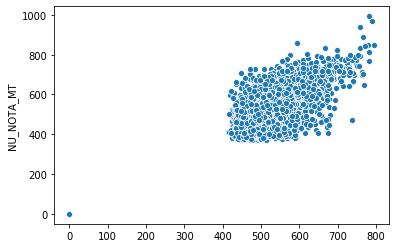

In [ ]:
sns.scatterplot(y_probk, y_test)
plt.show()

# Modelo Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Fit regression model
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
# Predict
y_2 = regr_2.predict(X_test)

In [ ]:
# The results
score = regr_2.score(X_test, y_test)
print(score)

0.9330440098143034


In [ ]:
from sklearn.metrics import mean_absolute_error
print(f'MAE {mean_absolute_error(y_test, y_2)}')

MAE 43.767042275310345


In [ ]:
from sklearn.metrics import mean_squared_error
print(f'MSE {mean_squared_error(y_test, y_2)}')

MSE 4153.973967297179


In [ ]:
from sklearn.model_selection import cross_val_score
resultado = cross_val_score(regr_2, X_test, y_test, cv = 10)
print(resultado.mean())

0.9354442929304361


In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_2)))

Root Mean Squared Error: 64.45133022131645


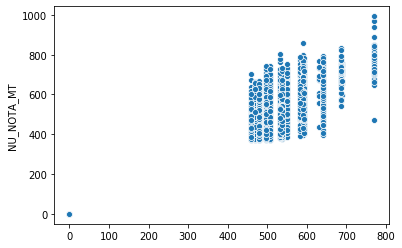

In [ ]:
sns.scatterplot(y_2, y_test)
plt.show()

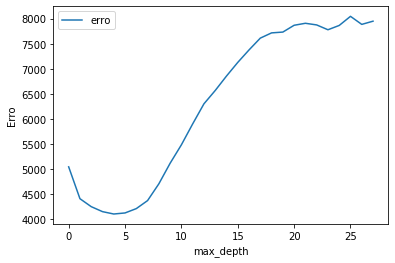

In [ ]:
max_depth = []
acc_mse = []
acc = []

for i in range(2,30):
    dtree = DecisionTreeRegressor(max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    #acc_mse.append(dtree.score(X_test, y_test))
    acc.append(mean_squared_error(y_test,pred))
    max_depth.append(i)


# visualizing changes in parameters
#plt.plot(acc_mse, data=d, label='Acc')
plt.plot(acc, data=d, label='erro')
plt.xlabel('max_depth')
plt.ylabel('Erro')
plt.legend()

In [ ]:
from sklearn import tree
text_representation = tree.export_text(regr_2)
print(text_representation)

|--- feature_12 <= 181.25
|   |--- value: [0.00]
|--- feature_12 >  181.25
|   |--- feature_13 <= 634.05
|   |   |--- feature_14 <= 513.05
|   |   |   |--- feature_14 <= 465.15
|   |   |   |   |--- feature_12 <= 448.05
|   |   |   |   |   |--- value: [459.44]
|   |   |   |   |--- feature_12 >  448.05
|   |   |   |   |   |--- value: [478.57]
|   |   |   |--- feature_14 >  465.15
|   |   |   |   |--- feature_15 <= 350.00
|   |   |   |   |   |--- value: [469.84]
|   |   |   |   |--- feature_15 >  350.00
|   |   |   |   |   |--- value: [497.65]
|   |   |--- feature_14 >  513.05
|   |   |   |--- feature_12 <= 518.65
|   |   |   |   |--- feature_15 <= 610.00
|   |   |   |   |   |--- value: [506.45]
|   |   |   |   |--- feature_15 >  610.00
|   |   |   |   |   |--- value: [532.28]
|   |   |   |--- feature_12 >  518.65
|   |   |   |   |--- feature_15 <= 690.00
|   |   |   |   |   |--- value: [538.21]
|   |   |   |   |--- feature_15 >  690.00
|   |   |   |   |   |--- value: [582.05]
|   |--- fe

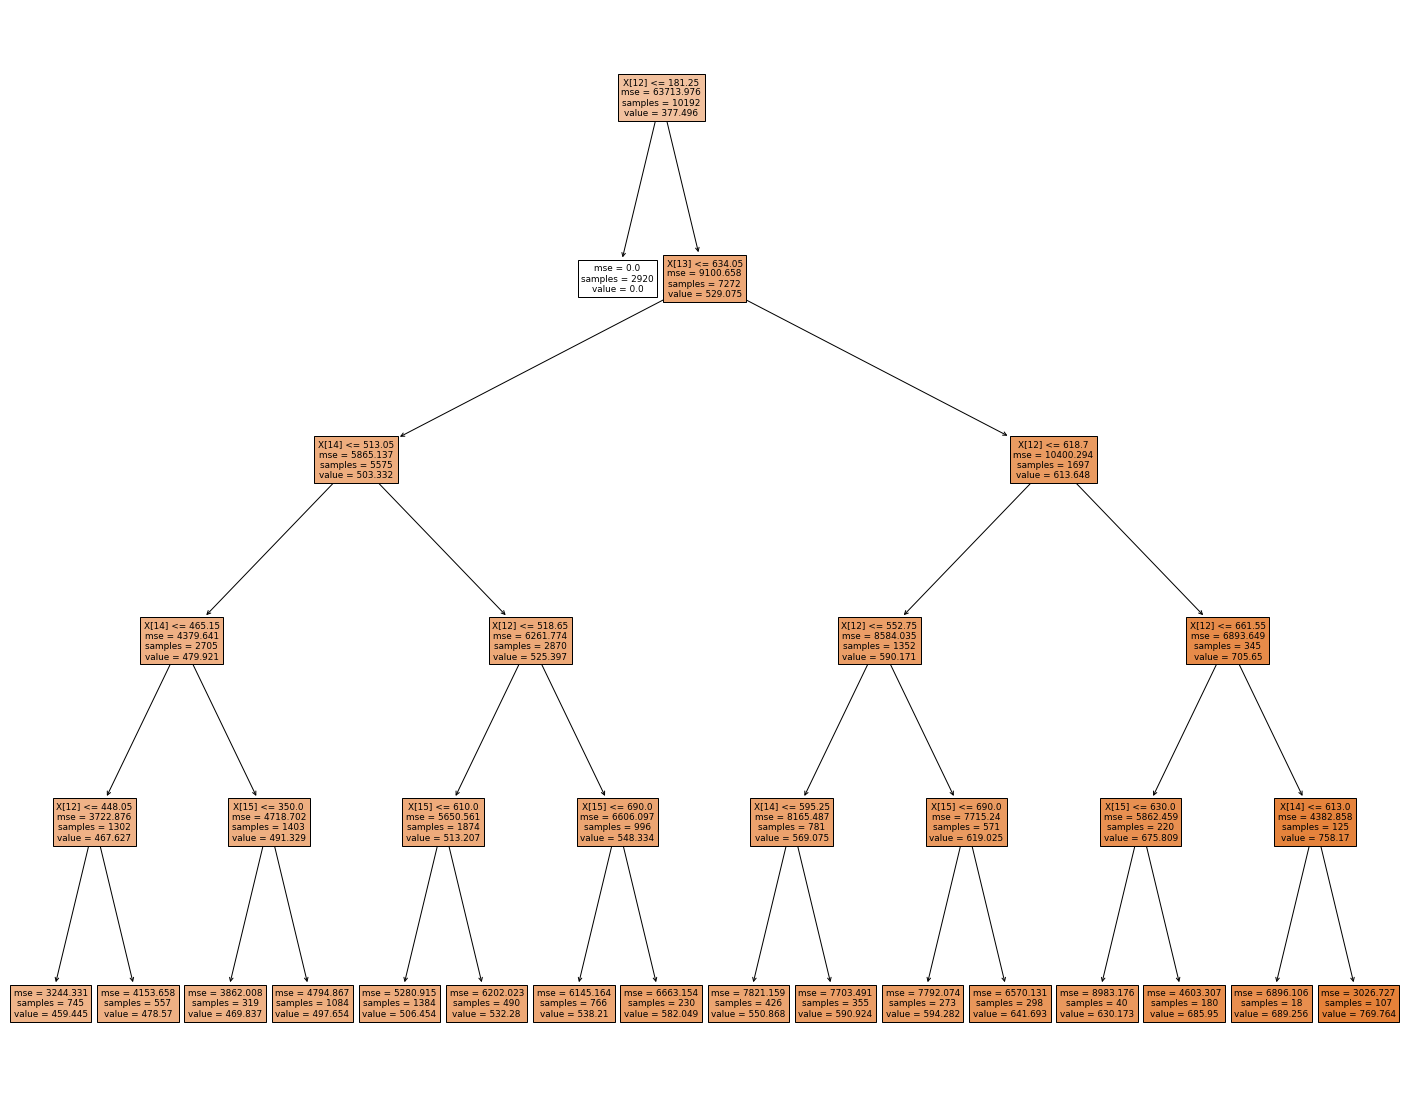

In [ ]:
#Desenhando a árvore
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr_2, 
                   filled=True)

# Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [ ]:
#criar uma instância do modelo

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)

C:\Users\math_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [ ]:
#O modelo está aprendendo a relação entre x (dígitos) e y (rótulos)

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
Y_prev = model.predict(X_test)
score = model.score(X_test, y_test)
print(score)

0.9371648894604936


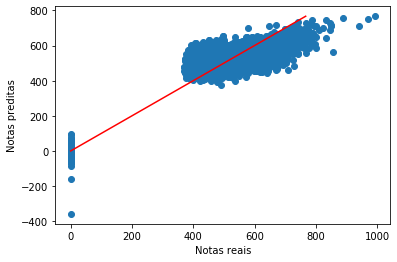

In [ ]:
plt.scatter(y_test, Y_prev)
range = [y_test.min(), Y_prev.max()]
plt.plot(range, range, 'red')
plt.xlabel('Notas reais')
plt.ylabel('Notas preditas')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
print(f'MAE {mean_absolute_error(y_test, Y_prev)}')

MAE 46.764925256247324


In [ ]:
from sklearn.metrics import mean_squared_error
print(f'MSE {mean_squared_error(y_test, Y_prev)}')

MSE 4062.8814688006196


In [ ]:
from sklearn.model_selection import cross_val_score
resultado = cross_val_score(model, X_test, y_test, cv = 10)
print(resultado.mean())

0.9365907472823538


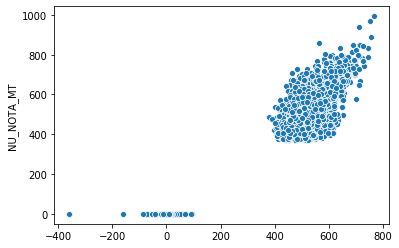

In [ ]:
sns.scatterplot(Y_prev, y_test)
plt.show()

In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_prev)))

Root Mean Squared Error: 63.740736337138586


In [ ]:
#TESTES ESTATÍSTICOS
from scipy.stats import wilcoxon, friedmanchisquare

mlp = [0.933, 0.937]
knn = [0.937, 0.939]
rl = [0.9408, 0.9305, 0.932, 0.934]
dt = [0.941, 0.9307, 0.933, 0.937]

# comparar
stat, p = friedmanchisquare(mlp, knn, rl, dt)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Mesmas distribuições (não rejeitar a hipótese nula)')
else:
    print('Distribuições diferentes (rejeitar a hipótese nula)')

ValueError: Unequal N in friedmanchisquare.  Aborting.

In [ ]:
#Executando o teste de Wilcoxon. 
#Quando zero_method = 'zsplit' as classificações zero são divididas entre positivas e negativas.
#O método supervisionado não precisou deste teste
wilcoxon(rl, dt, zero_method='zsplit')

WilcoxonResult(statistic=0.0, pvalue=0.06559969214707187)

# Modelos Não Supervisionados

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X)

# Apply transform to both the training set and the test set.
X = scaler.transform(X)

In [ ]:
#Testar esse

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
#K-Means com k = [2,20]
#5 execuções para cada k variando o valor do seed

from sklearn.cluster import KMeans

kmeans = KMeans(
     init="random",
     n_clusters=5,
     n_init=10,
     max_iter=300,
     random_state=25 #Variar 5 vezes o valor (0,25,45,60,100)
 )

In [ ]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=25,
       tol=0.0001, verbose=0)

In [ ]:
#Eficiência do Kmeans

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.09278846153846154


In [ ]:
kmeans.inertia_

197193367.7765443

In [ ]:
kmeans.cluster_centers_

array([[ 1.34564207e+01,  3.23649041e-01,  1.56885532e-01,
         2.30883207e+00,  1.04503196e+00,  3.08832074e-01,
         3.83149332e+00,  2.64090645e-01,  1.25595584e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         4.59255607e+02,  5.32540151e+02,  4.85574288e+02,
         3.41411970e+02,  2.71615340e+00,  2.79081929e+00,
         2.18593841e+00,  4.75595584e-01,  6.59790819e-01,
         3.08832074e-01],
       [ 1.43441860e+01,  3.71162791e-01,  3.95348837e-02,
         2.09302326e+00,  1.02000000e+00,  3.66511628e-01,
         2.25860465e+00,  4.93023256e-01,  1.05767442e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         5.60411163e+02,  6.40314837e+02,  5.92217674e+02,
         7.87004651e+02,  3.35813953e+00,  3.54186047e+00,
         3.90139535e+00,  9.25116279e-01,  8.52093023e-01,
         3.66511628e-01],
       [ 1.42219743e+01,  3.54155047e-01,  2.57389849e-01,
         2.21305075e+00,  1.03262688e+00,  1.13218070e-01,
    

In [ ]:
kmeans.n_iter_

16

In [ ]:
kmeans.labels_[:5]

array([2, 0, 2, 2, 4])

In [ ]:
#Elbow method

In [ ]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 25,
 }

In [ ]:
sse = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

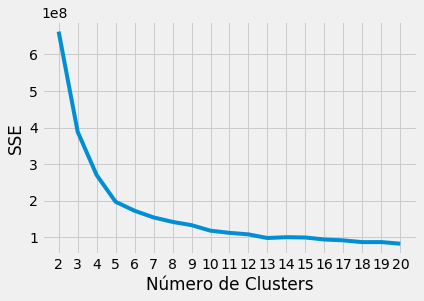

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 21), sse)
plt.xticks(range(2, 21))
plt.xlabel("Número de Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
from kneed import KneeLocator

kl = KneeLocator(
    range(2, 21), sse, curve="convex", direction="decreasing")

In [ ]:
kl.elbow

5

In [ ]:
#Índice Silhouette
from sklearn.metrics import silhouette_score, adjusted_rand_score

k_silhouette_coefficients = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    print(k)
    score = silhouette_score(X, kmeans.labels_)
    k_silhouette_coefficients.append(score)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


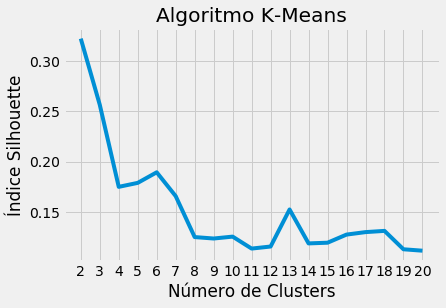

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 21), k_silhouette_coefficients)
plt.xticks(range(2, 21))
plt.title("Algoritmo K-Means")
plt.xlabel("Número de Clusters")
plt.ylabel("Índice Silhouette")
plt.show()

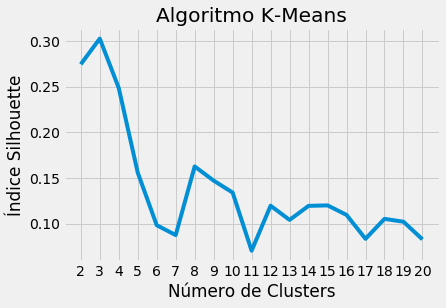

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 21), silhouette_coefficients)
plt.xticks(range(2, 21))
plt.title("Algoritmo K-Means")
plt.xlabel("Número de Clusters")
plt.ylabel("Índice Silhouette")
plt.show()

In [ ]:
#Índice DB
from sklearn.metrics import davies_bouldin_score

k_davies_bouldin_coefficients = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = davies_bouldin_score(X, kmeans.labels_)
    k_davies_bouldin_coefficients.append(score)

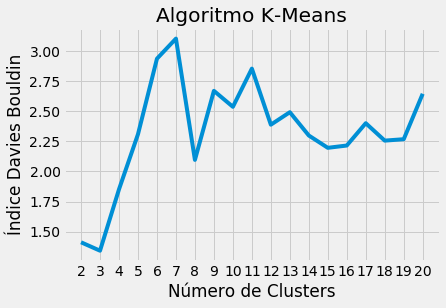

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 21), davies_bouldin_coefficients)
plt.xticks(range(2, 21))
plt.title("Algoritmo K-Means")
plt.xlabel("Número de Clusters")
plt.ylabel("Índice Davies Bouldin")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
score = adjusted_rand_score(y, kmeans.labels_)
score

0.28921947825236216

In [ ]:
kmeans.labels_

array([1, 3, 1, ..., 0, 1, 1])

In [ ]:
#Índice CR
from sklearn.metrics import adjusted_rand_score

k_ARI_coefficients = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    print(k)
    score = adjusted_rand_score(y, kmeans.labels_) #(label true, label pred)
    k_ARI_coefficients.append(score)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


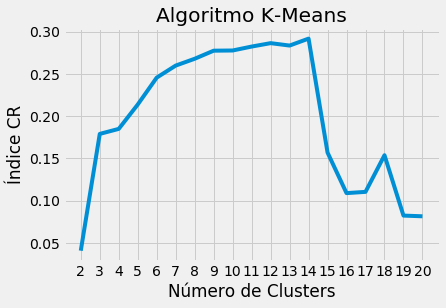

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 21), ARI_coefficients)
plt.xticks(range(2, 21))
plt.title("Algoritmo K-Means")
plt.xlabel("Número de Clusters")
plt.ylabel("Índice CR")
plt.show()

In [ ]:
#Hieráquico aglomerativo

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

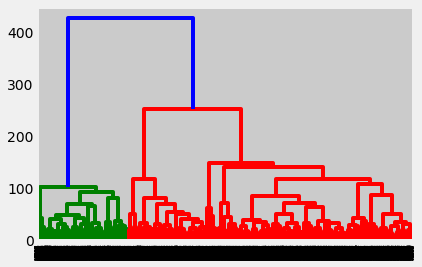

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X_train, method='ward'))

In [ ]:
#Varia número de clusters entre 2 e 20
model = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
model.fit(X_train)
labels = model.labels_

In [ ]:
#Elbow


In [ ]:
#Índice Silhouette

silhouette_coefficients = []

for k in range(2, 21):
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    model.fit(X)
    print(k)
    score = silhouette_score(X, model.labels_)
    silhouette_coefficients.append(score)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


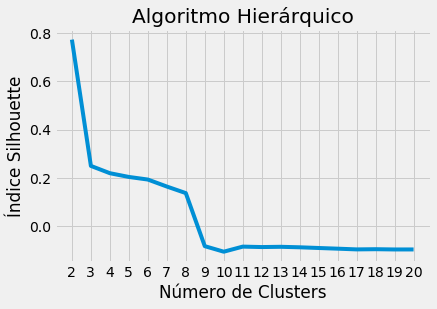

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 21), silhouette_coefficients)
plt.xticks(range(2, 21))
plt.title("Algoritmo Hierárquico")
plt.xlabel("Número de Clusters")
plt.ylabel("Índice Silhouette")
plt.show()

In [ ]:
#Índice DB

davies_bouldin_coefficients = []

for k in range(2, 21):
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    model.fit(X)
    print(k)
    score = davies_bouldin_score(X, model.labels_)
    davies_bouldin_coefficients.append(score)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


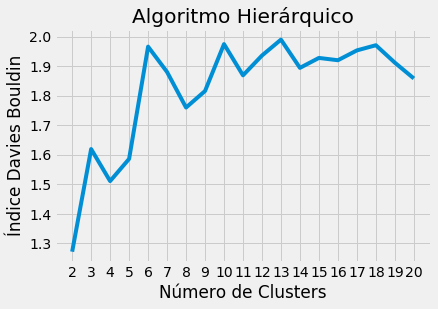

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 21), davies_bouldin_coefficients)
plt.xticks(range(2, 21))
plt.title("Algoritmo Hierárquico")
plt.xlabel("Número de Clusters")
plt.ylabel("Índice Davies Bouldin")
plt.show()

In [ ]:
#Índice CR
from sklearn.metrics import adjusted_rand_score

ARI_coefficients = []

for k in range(2, 21):
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    model.fit(X)
    print(k)
    score = adjusted_rand_score(y, model.labels_) #(label true, label pred)
    ARI_coefficients.append(score)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


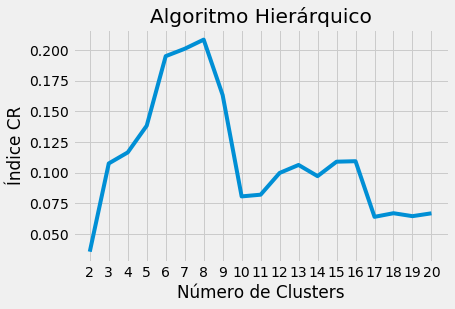

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 21), ARI_coefficients)
plt.xticks(range(2, 21))
plt.title("Algoritmo Hierárquico")
plt.xlabel("Número de Clusters")
plt.ylabel("Índice CR")
plt.show()

In [ ]:
#Teste Estatístico com índice silhoutte
kmeans = k_silhouette_coefficients
hierarquico = silhouette_coefficients

In [ ]:
#kmeans

[0.32214950558571775,
 0.256478039585454,
 0.17496030763729842,
 0.17890571815896622,
 0.18940044939857492,
 0.1657478668718427,
 0.12507832275395495,
 0.123650004192792,
 0.1255307560753734,
 0.11365529042611272,
 0.11570012318909989,
 0.15248478839230312,
 0.11879240869855166,
 0.11948861455576598,
 0.12754981268297677,
 0.1300036853906374,
 0.13122993472535105,
 0.11296055404972241,
 0.1115522704240141]

In [ ]:
#Teste Estatístico com índice DB
kmeans_bd = k_davies_bouldin_coefficients
hierarquico_bd = davies_bouldin_coefficients

In [ ]:
#Teste Estatístico com índice CR
kmeans_a = k_ARI_coefficients
hierarquico_a = ARI_coefficients

In [ ]:
# comparar Fiedman
stat, p = friedmanchisquare(kmeans, kmeans_bd, kmeans_a, hierarquico, hierarquico_bd, hierarquico_a)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Mesmas distribuições (não rejeitar a hipótese nula)')
else:
    print('Distribuições diferentes (rejeitar a hipótese nula)')

Statistics=71.932, p=0.000
Distribuições diferentes (rejeitar a hipótese nula)


In [ ]:
#Wilcoxon
#Executando o teste de Wilcoxon. 
#Quando zero_method = 'zsplit' as classificações zero são divididas entre positivas e negativas.
#O método supervisionado não precisou deste teste
wilcoxon(kmeans_a, hierarquico_a, zero_method='zsplit')

WilcoxonResult(statistic=80.0, pvalue=0.5460878490645904)

In [ ]:
data = {'Silhouette_kmeans':kmeans,
        'Silhouette_hierarquico':hierarquico,
       'BD_kmeans': kmeans_bd,
       'BD_hierarquico': hierarquico_bd,
       'CR_kmeans': kmeans_a,
       'CR_hierarquico': hierarquico_a}
data_k = pd.DataFrame(data)
data_k

,Silhouette_kmeans,Silhouette_hierarquico,BD_kmeans,BD_hierarquico,CR_kmeans,CR_hierarquico
0,0.322150,0.321028,1.274174,1.271994,0.031655,0.030071
1,0.256478,0.240517,1.580504,1.619293,0.143954,0.131384
2,0.174960,0.250395,2.140465,1.510896,0.272846,0.148673
3,0.178906,0.250698,1.923299,1.586075,0.286051,0.193289
4,0.189400,0.181607,1.869630,1.965869,0.314174,0.316841
5,0.165748,0.188475,2.083243,1.880045,0.409869,0.331432
6,0.125078,0.188239,2.387102,1.759804,0.198496,0.355565
7,0.123650,0.174108,2.324233,1.815727,0.287298,0.281713
8,0.125531,0.155511,2.124674,1.974359,0.240106,0.137250
9,0.113655,0.151601,2.269279,1.868774,0.282863,0.143709


In [ ]:
# First, we extract the algorithms names.
algorithms_names = data_k.columns
# Then, we extract the performances as a numpy.ndarray.
performances_array = data_k[algorithms_names].values

In [ ]:
ranks = np.array([rankdata(-p) for p in performances_array])

In [ ]:
ranks

array([[3., 4., 1., 2., 5., 6.],
       [3., 4., 2., 1., 5., 6.],
       [5., 4., 1., 2., 3., 6.],
       [6., 4., 1., 2., 3., 5.],
       [5., 6., 2., 1., 4., 3.],
       [6., 5., 1., 2., 3., 4.],
       [6., 5., 1., 2., 4., 3.],
       [6., 5., 1., 2., 3., 4.],
       [6., 4., 1., 2., 3., 5.],
       [6., 4., 1., 2., 3., 5.],
       [6., 5., 1., 2., 4., 3.],
       [5., 6., 2., 1., 3., 4.],
       [6., 5., 1., 2., 3., 4.],
       [6., 5., 1., 2., 4., 3.],
       [6., 5., 1., 2., 4., 3.],
       [5., 6., 2., 1., 4., 3.],
       [4., 5., 2., 1., 6., 3.],
       [5., 4., 1., 2., 6., 3.],
       [5., 4., 1., 2., 6., 3.]])

In [ ]:
cd

0.37735538751992903

In [ ]:
average_ranks = np.mean(ranks, axis=0)

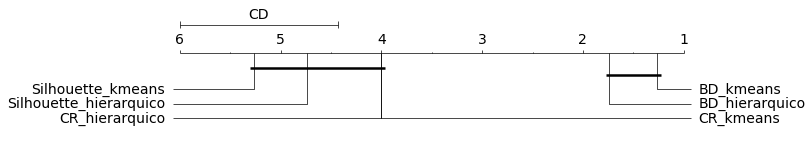

In [ ]:
# This method computes the critical difference for Nemenyi test with alpha=0.1.
# For some reason, this method only accepts alpha='0.05' or alpha='0.1'.
from Orange.evaluation import compute_CD, graph_ranks

cd = compute_CD(average_ranks,
                n=len(data_k),
                alpha='0.1',
                test='nemenyi')

# This method generates the plot.
graph_ranks(average_ranks,
            names=algorithms_names,
            cd=cd,
            width=10,
            textspace=1.5,
            reverse=True)
plt.show()

# Boosting e Bagging

In [ ]:
#Colocar aqui o regressor que vai ser usado de acordo com a tabela
regressor = MLPRegressor(random_state=1, max_iter=5000, hidden_layer_sizes= (23, 12, 1)) 

In [ ]:
from sklearn.ensemble import BaggingRegressor
#MLP

regr = BaggingRegressor(base_estimator=regressor,
                        n_estimators=20, random_state=0).fit(X_train, y_train)

C:\Users\math_\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\math_\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\math_\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\math_\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

In [ ]:
regr.score(X_test, y_test)

#10 - 69.4%
#15 - 56.1%
#20 - 60.8%

0.6088289757296386

In [ ]:
#AD
regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                        n_estimators=20, random_state=0).fit(X_train, y_train)

In [ ]:
regr.score(X_test, y_test)
#10 - 93.9%
#15 - 93.9%
#20 - 93.9%

0.9398800398349192

In [ ]:
#KNN
regr = BaggingRegressor(base_estimator=neighbors.KNeighborsRegressor(n_neighbors),
                        n_estimators=20, random_state=0).fit(X_train, y_train)

In [ ]:
regr.score(X_test, y_test)
#10 - 93.5%
#15 - 93.5%
#20 - 93.5%

0.9353795089681445

In [ ]:
#Regressão Linear
regr = BaggingRegressor(base_estimator=LinearRegression(),
                        n_estimators=20, random_state=0).fit(X_train, y_train)

In [ ]:
regr.score(X_test, y_test)
#10 - 93.7%
#15 - 93.7%
#20 - 93.7%

0.9371400679914242

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

regr = AdaBoostRegressor(base_estimator=MLPRegressor(random_state=1, max_iter=5000, hidden_layer_sizes= (23, 12, 1)), random_state=0, n_estimators=15).fit(X_train, y_train)

C:\Users\math_\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\math_\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\math_\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\math_\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

In [ ]:
regr.score(X_test, y_test)
#Boost MLP
#10 - 9.4%
#15 - 93.9%
#20 - 93.9%

0.9393712037833963

In [ ]:
regr = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                        n_estimators=20, random_state=0).fit(X_train, y_train)

In [ ]:
regr.score(X_test, y_test)
#Boost AD
#10 - 93.9%
#15 - 93.9%
#20 - 93.8%

0.9389580826055345

In [ ]:
regr = AdaBoostRegressor(base_estimator=neighbors.KNeighborsRegressor(n_neighbors),
                        n_estimators=15, random_state=0).fit(X_train, y_train)

In [ ]:
regr.score(X_test, y_test)
#Boost knn
#10 - 92.5%
#15 - 92.5%
#20 - 91.9%

0.9255358676002168

In [ ]:
regr = AdaBoostRegressor(base_estimator=LinearRegression(),
                        n_estimators=15, random_state=0).fit(X_train, y_train)

In [ ]:
regr.score(X_test, y_test)
#Boost Linear
#10 - 93.5%
#15 - 93.2%
#20 - 93.2%

0.9320715220114758

In [ ]:
#Stacking
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

estimators = [
    ('lr', LinearRegression()),
    ('ad', DecisionTreeRegressor(max_depth=5)),
   ('knn', neighbors.KNeighborsRegressor(n_neighbors))
]

reg = StackingRegressor(estimators=estimators)

In [ ]:
reg.fit(X_train, y_train).score(X_test, y_test)

0.9399056284947539

# Tabela Stacking homogeneo
LR 

10 - 91.2
15 - 91.3
20 - 91.3

AD 

10 - 93.4
15 - 93.3
20 - 93.4

KNN 

10 - 90.4
15 - 90.5
20 - 90.6

MLP (500 iterações, lento)

10 - 91.2
15 - 91.3
20 - 91.3 
# Tabela Stacking Heterogeneo (3 regressores) 

33% todos - 94
50%  lr e ad - 93.9  
50% lr e knn - 93.9
50% ad e knn - 93.7

In [ ]:
#TESTES ESTATÍSTICOS
from scipy.stats import wilcoxon, friedmanchisquare

bag = [0.621, 0.939, 0.935, 0.937]
boo = [0.657, 0.9386, 0.923, 0.933]
stk = [0.912, 0.9336, 0.905, 0.912]

# comparar
stat, p = friedmanchisquare(bag, boo, stk)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Mesmas distribuições (não rejeitar a hipótese nula)')
else:
    print('Distribuições diferentes (rejeitar a hipótese nula)')

Statistics=2.000, p=0.368
Mesmas distribuições (não rejeitar a hipótese nula)


In [ ]:
# TESTE ESTATÍSTICO

# Criar testes randomicos com 50% da base original

# Fazer o Bagging com os testes aleatorios (para 2 regressores do comitê)

#X = dados.drop("NU_NOTA_MT",1)
#y = dados["NU_NOTA_MT"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 50)

#Configs - 1)test_size = 0.2 
#2)test_size = 0.3 
#3)test_size = 0.4

In [ ]:
#6 testes com bagging AD 
from sklearn.ensemble import BaggingRegressor

#AD
regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                        n_estimators=20, random_state=0).fit(X_train, y_train)
regr.score(X_test, y_test)

0.9426316075048958

In [ ]:
#6 testes com bagging Reg. Linear

#Regressão Linear
regr = BaggingRegressor(base_estimator=LinearRegression(),
                        n_estimators=20, random_state=0).fit(X_train, y_train)
regr.score(X_test, y_test)

0.9404410198116858

In [ ]:
#6 testes AD (3 base de dados 20k e 3 base de dados 10k)
1- 93.8
2- 93.9
3- 93.9
4- 94
5- 94.2
6- 94.1
7- 94.7
8- 94.4
9- 94.2
Intervalo de Confiança para a média (rodando várias vezes e usando a média)
Intervalo de confiança (Média) -  94.13

#6 testes RegLinear
1- 93.4
2- 93.7
3- 93.6
4- 93.7
5- 93.8
6- 93.7
7- 94.4
8- 94.1
9- 94
Media - 93.82

Desvio padrão amostral(z) = 

In [ ]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [ ]:
ad = [0.938, 0.939, 0.939, 0.94, 0.942, 0.941, 0.947, 0.944, 0.942]
rl = [0.934, 0.937, 0.936, 0.937, 0.938, 0.937, 0.944, 0.941, 0.94]

In [ ]:
from scipy.stats import wilcoxon
wilcoxon(ad, rl, zero_method='zsplit')

WilcoxonResult(statistic=0.0, pvalue=0.007526315166457887)

In [ ]:
mean_confidence_interval(ad)

(0.9413333333333332, 0.9391592117848981, 0.9435074548817683)

In [ ]:
ad_2 = [0.939, 0.939, 0.939]
mean_confidence_interval(ad_2)

(0.939, 0.939, 0.939)

In [ ]:
mean_confidence_interval(rl)

(0.9382222222222221, 0.9359233464014154, 0.9405210980430287)

In [ ]:
rl_2 = [93.7, 93.7, 93.7]
mean_confidence_interval(rl_2)

(93.7, 93.7, 93.7)

In [ ]:
#Intervalo de Confiança para a Proporção

In [ ]:
#Teste de Hipóteses
import statistics

#Calcular a média e o desvio padrão das amostras 
Media_ad = 0.9413333333333334
Media_rl = 0.9382222222222224

In [ ]:
DP_ad2 = DP_ad*DP_ad
DP_rl2 = DP_rl*DP_rl

In [ ]:
media = Media_ad - Media_rl

In [ ]:
DP_ad = statistics.stdev(ad)
DP_rl = statistics.stdev(rl)

In [ ]:
DP_rl

0.0029907264074876825

In [ ]:
media

0.0031111111111109535

In [ ]:
import math
num = (DP_ad2/9)+(DP_rl2/9)
raiz = math.sqrt(num)

In [ ]:
#Divisão medias pelo erro padrão
#Estatística de Teste
Est_teste = media/raiz

In [ ]:
Est_teste
#Olhando a tabela Z - 0.9981
#p = 0.9981
#Teste não igual (bicaudal): 2 x p = 0.9962
#Alfa = 0.05 nível de significancia
#p-Valor = 0,9962 > 0.05

#Valores altos de p-valor evidenciam que a hipótese nula é verdadeira. 
#Não existe uma diferença estatística significante entre ad e rl

2.2673737245008665

# Métricas para AVALIAÇÃO DO MODELO

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, y_pred_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8)  )
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))

In [ ]:
X_testN = df_test1.drop(columns =['NU_INSCRICAO'], axis=1)

ypredict_test = model_lr.predict(X_testN)

In [ ]:
df_test1['NU_NOTA_MT'] = ypredict_test

In [ ]:
#answer = df_test1[['NU_INSCRICAO','NU_NOTA_MT']]

In [ ]:
# SALVANDO NOSSA RESPOSTA
#answer.to_csv("answer.csv",index=False)

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)